<a href="https://colab.research.google.com/github/AdeWorks33/MbioHoward/blob/main/cleaned_edited_crops_data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from typing import ValuesView
import re
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/data

/content/drive/MyDrive/Colab Notebooks/data


In [5]:
edited_crops = pd.read_csv('edited_crops.csv')

edited_crops.replace(',', '', regex=True, inplace=True)

edited_crops.head()


,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Y1961,Y1962,Y1963,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,238.0,'231,Ethiopia,44.0,Barley,5312.0,Area harvested,NaN,NaN,NaN,...,1190750.0,1203252.0,1166061.0,1133655,1171213.0,1014198.0,800195.0,950742.0,897016.0,960000.0
1,238.0,'231,Ethiopia,44.0,Barley,5419.0,Yield,NaN,NaN,NaN,...,15972.0,17022.0,17673.0,18122,18964.0,19328.0,21856.0,25012.0,25209.0,24479.0
2,238.0,'231,Ethiopia,656.0,Coffee green,5419.0,Yield,NaN,NaN,NaN,...,5213.0,7280.0,7476.0,6989,6697.0,6188.0,6466.0,6362.0,6827.0,6654.0
3,238.0,'231,Ethiopia,656.0,Coffee green,5312.0,Area harvested,NaN,NaN,NaN,...,528571.0,538466.0,561762.0,653910,700475.0,725961.0,764863.0,758523.0,856592.0,685294.0
4,238.0,'231,Ethiopia,56.0,Maize (corn),5419.0,Yield,NaN,NaN,NaN,...,25933.0,27403.0,29502.0,27765,29468.0,33119.0,41904.0,42368.0,42404.0,42379.0


<Figure size 1200x800 with 0 Axes>

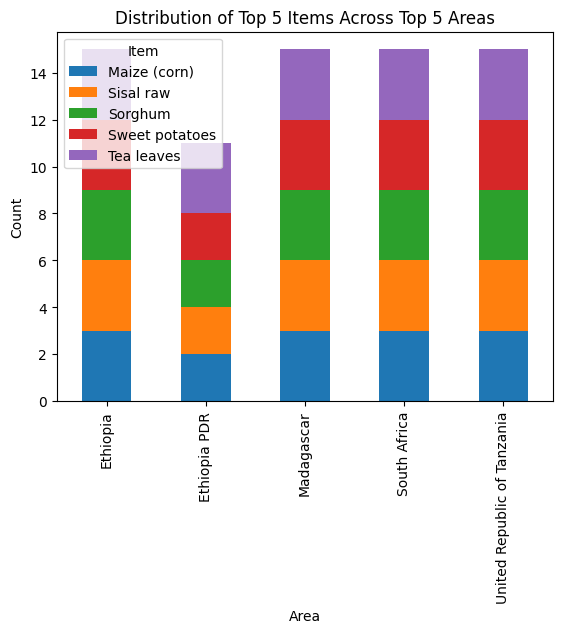

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd


# Select the first five items and first five areas
top_items = edited_crops['Item'].value_counts().index[:5]
top_areas = edited_crops['Area'].value_counts().index[:5]

# Filter the data for the top five items and top five areas
filtered_data = edited_crops[edited_crops['Item'].isin(top_items) & edited_crops['Area'].isin(top_areas)]

# Group the filtered data by 'Area' and 'Item' and count the occurrences
item_area_counts = filtered_data.groupby(['Area', 'Item']).size().unstack(fill_value=0)

# Plot the distribution of top five items across top five areas
plt.figure(figsize=(12, 8))
item_area_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Top 5 Items Across Top 5 Areas')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Item')
plt.show()


In [ ]:
print(edited_crops.head())


   Area Code Area Code (M49)      Area  Item Code Item Code (CPC)  \
0        238            '231  Ethiopia         44           '0115   
1        238            '231  Ethiopia         44           '0115   
2        238            '231  Ethiopia         44           '0115   
3        238            '231  Ethiopia        656          '01610   
4        238            '231  Ethiopia        656          '01610   

           Item  Element Code         Element  Y1961  Y1962  ...       Y2012  \
0        Barley          5312  Area harvested    NaN    NaN  ...  1190750.00   
1        Barley          5419           Yield    NaN    NaN  ...    15972.00   
2        Barley          5510      Production    NaN    NaN  ...  1901811.48   
3  Coffee green          5312  Area harvested    NaN    NaN  ...   528571.00   
4  Coffee green          5419           Yield    NaN    NaN  ...     5213.00   

       Y2013       Y2014      Y2015       Y2016       Y2017       Y2018  \
0  1203252.0  1166061.00  113

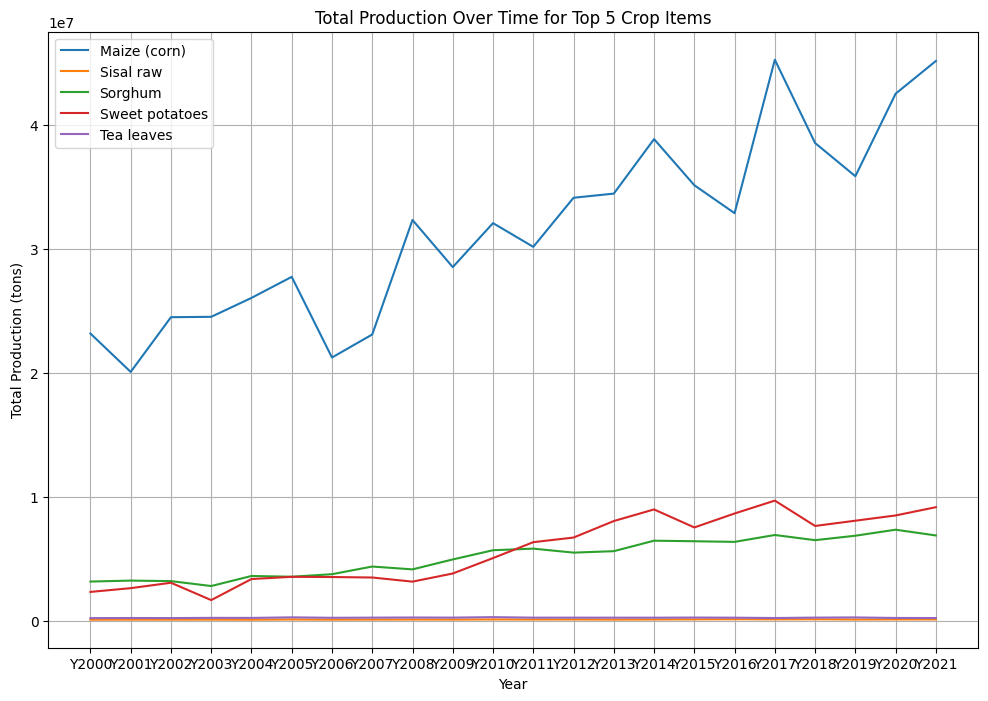

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming edited_crops is your DataFrame containing the crop data

# Step 1: Extract the year from column names
years = [col for col in edited_crops.columns if col.startswith('Y2')]

# Step 2: Convert non-numeric values to NaN and then fill NaN values with 0
edited_crops[years] = edited_crops[years].apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 3: Calculate total production for each crop type for each year
total_production_over_time = edited_crops.groupby('Item')[years].sum()

# Step 4: Plot line graphs for total production over time for the top five crop items
plt.figure(figsize=(12, 8))

# Get the top five crop items
top_items = edited_crops['Item'].value_counts().index[:5]

# Plot line graphs for each top item
for item in top_items:
    plt.plot(total_production_over_time.loc[item], label=item)

plt.title('Total Production Over Time for Top 5 Crop Items')
plt.xlabel('Year')
plt.ylabel('Total Production (tons)')
plt.legend()
plt.grid(True)
plt.show()



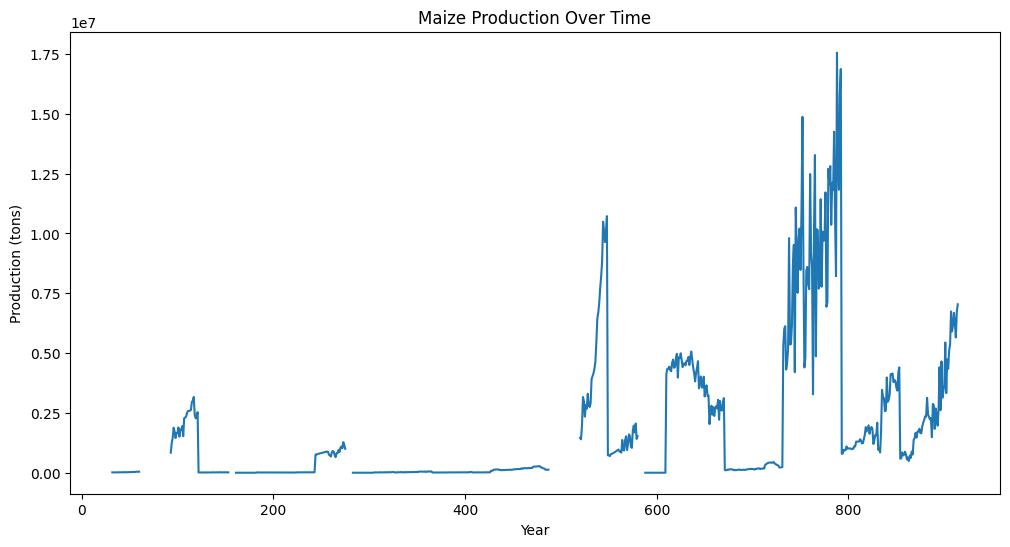

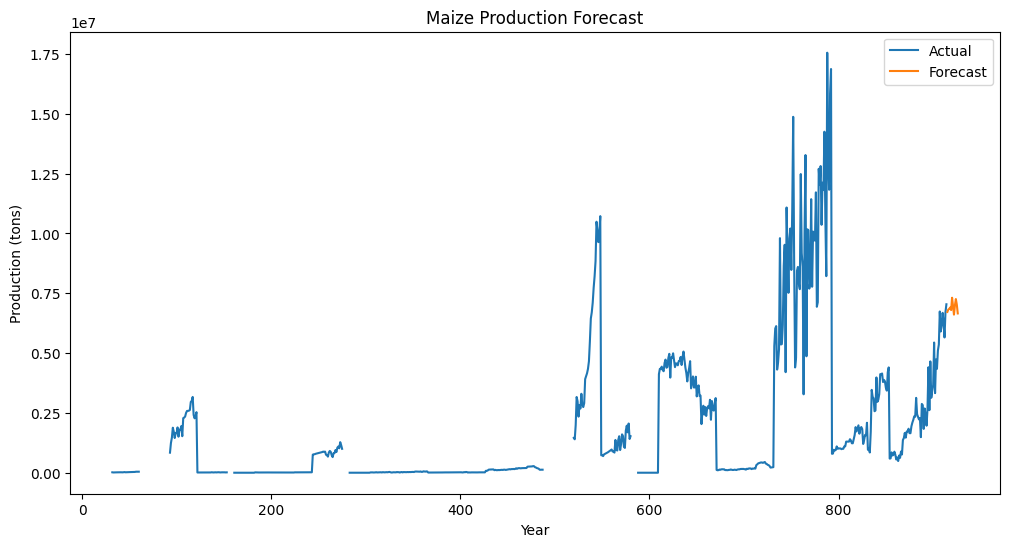

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Choose a time series
time_series = edited_crops.loc[edited_crops['Item'] == 'Maize (corn)', 'Y1961':'Y2021'].values.flatten()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Maize Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.show()

# Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Evaluate the model (diagnostic plots, statistical metrics)

# Forecast
forecast = results.forecast(steps=12)  # Forecast for the next 12 months

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label='Forecast')
plt.title('Maize Production Forecast')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.legend()
plt.show()


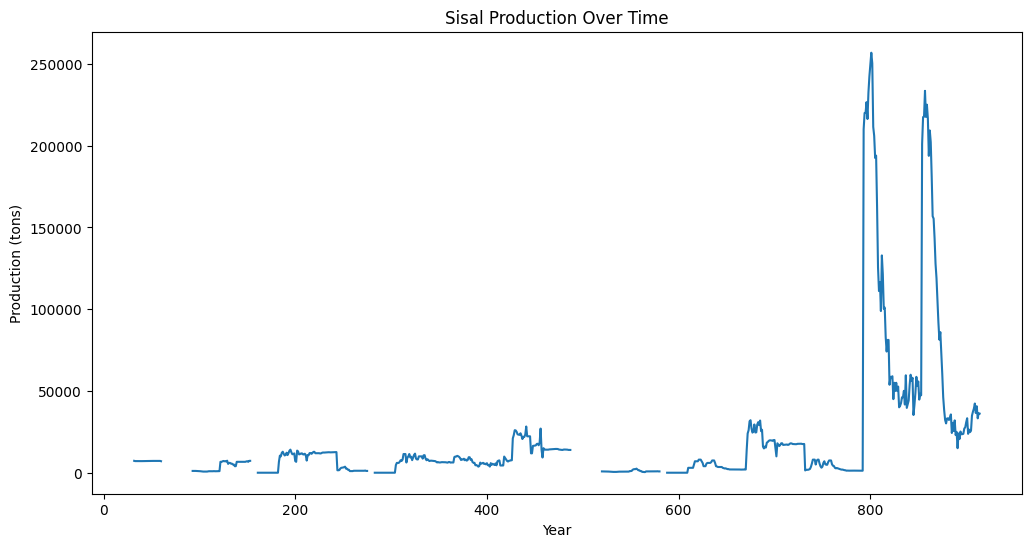

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


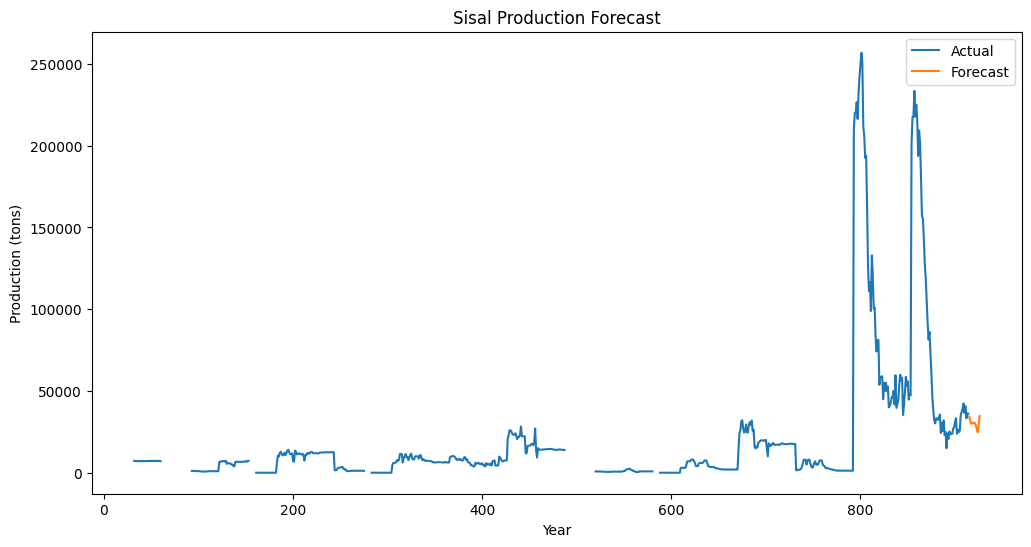

In [12]:
# Choose a time series
time_series = edited_crops.loc[edited_crops['Item'] == 'Sisal raw', 'Y1961':'Y2021'].values.flatten()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Sisal Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.show()

# Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Evaluate the model (diagnostic plots, statistical metrics)

# Forecast
forecast = results.forecast(steps=12)  # Forecast for the next 12 months

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label='Forecast')
plt.title('Sisal Production Forecast')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.legend()
plt.show()


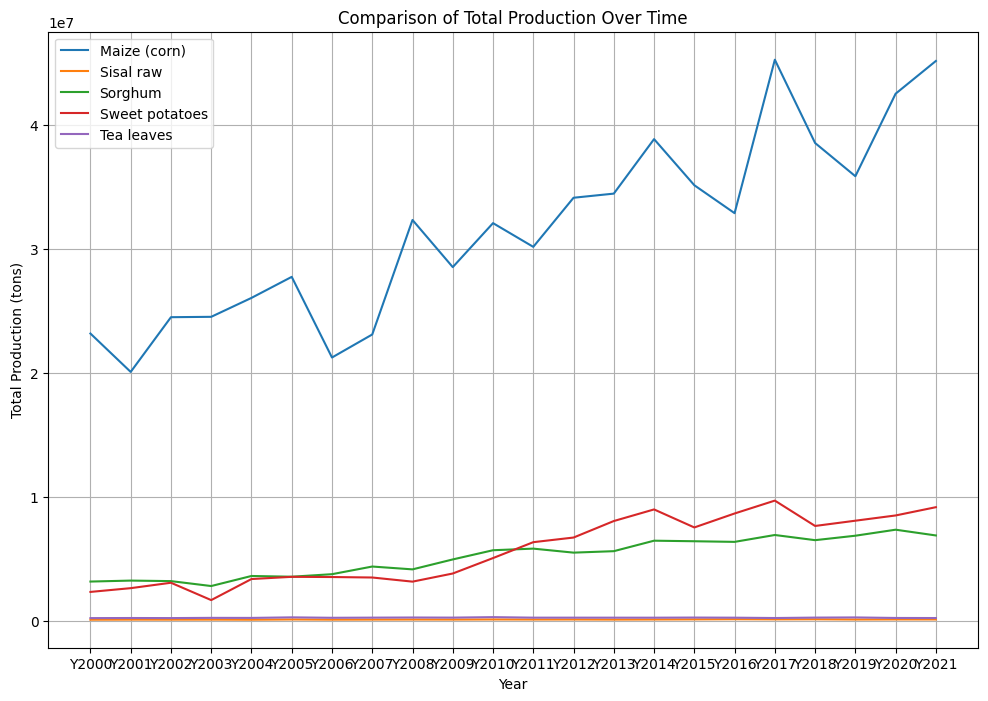

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming edited_crops is your DataFrame containing the crop data

# Step 1: Extract the year from column names
years = [col for col in edited_crops.columns if col.startswith('Y2')]

# Step 2: Convert non-numeric values to NaN and then fill NaN values with 0
edited_crops[years] = edited_crops[years].apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 3: Calculate total production for each crop type for each year
total_production_over_time = edited_crops.groupby('Item')[years].sum()

# Step 4: Plot line graphs for total production over time for the top five crop items
plt.figure(figsize=(12, 8))

# Get the top five crop items
top_items = edited_crops['Item'].value_counts().index[:5]

# Plot line graphs for each top item
for item in top_items:
    plt.plot(total_production_over_time.loc[item], label=item)

plt.title('Comparison of Total Production Over Time')
plt.xlabel('Year')
plt.ylabel('Total Production (tons)')
plt.legend()
plt.grid(True)
plt.show()


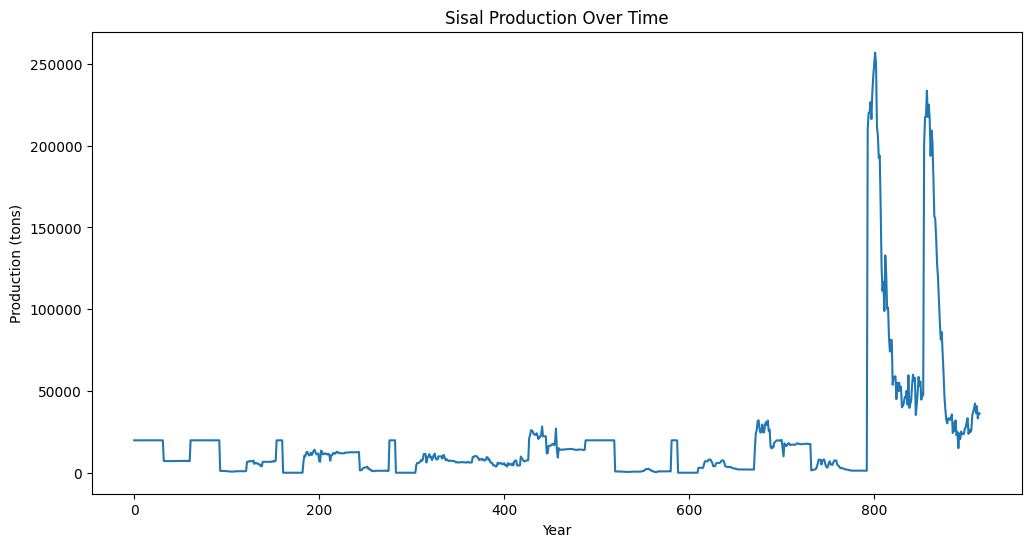

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


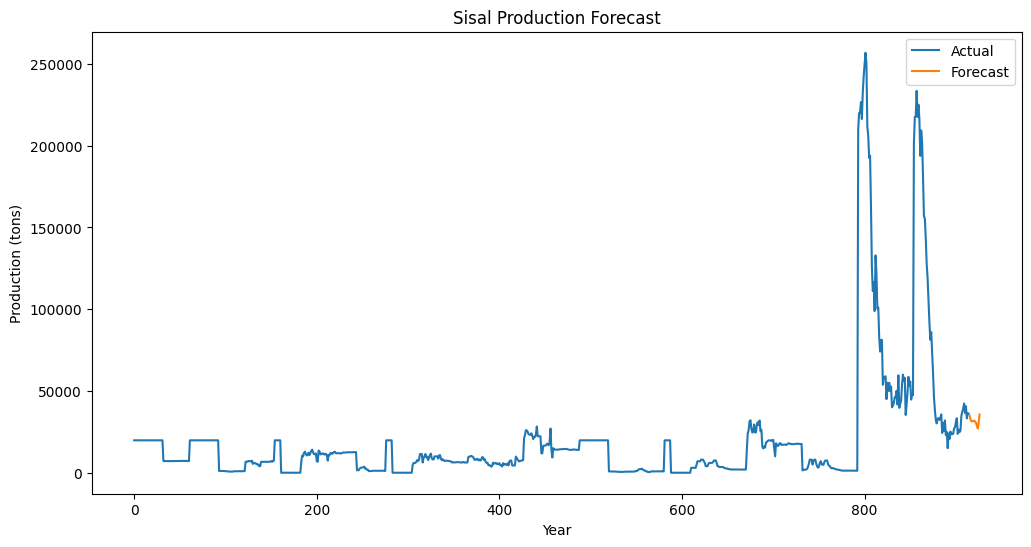

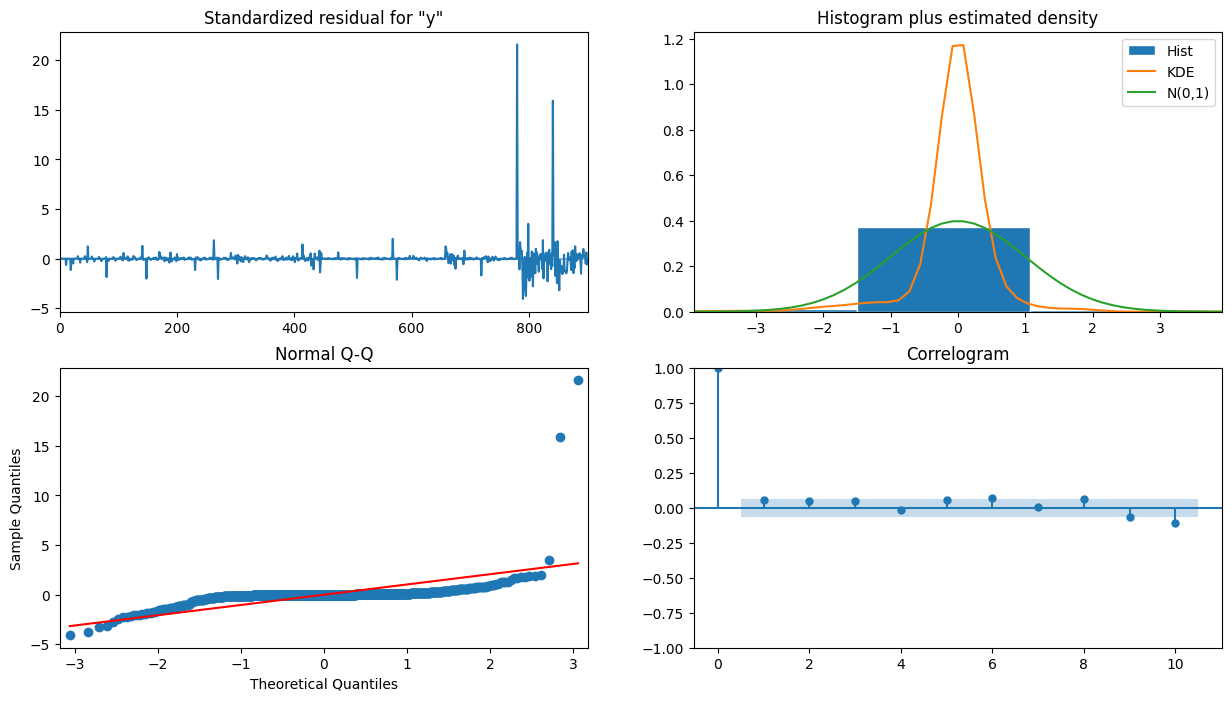

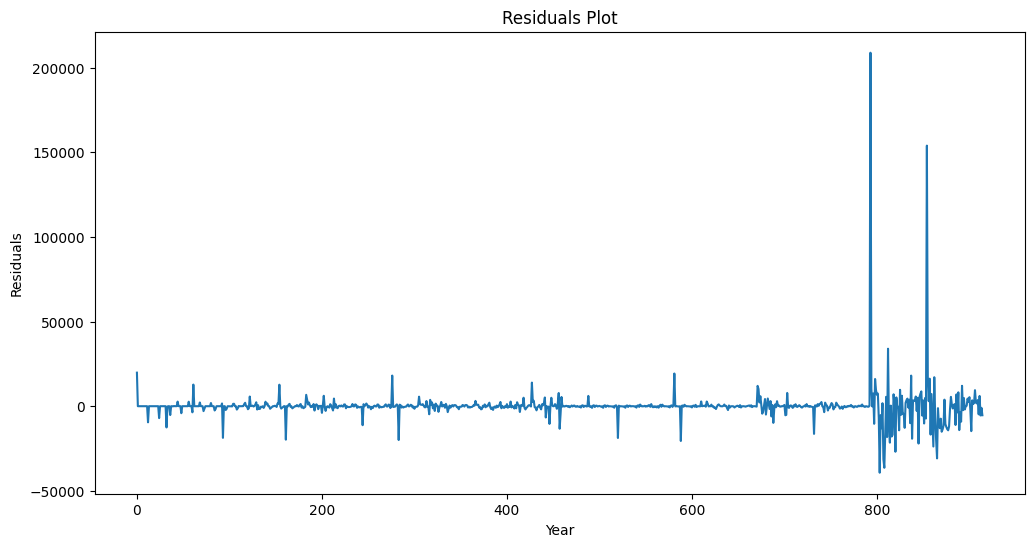

Mean Absolute Error (MAE): 2534.788770715975
Mean Squared Error (MSE): 99064678.24248452
Root Mean Squared Error (RMSE): 9953.124044363383


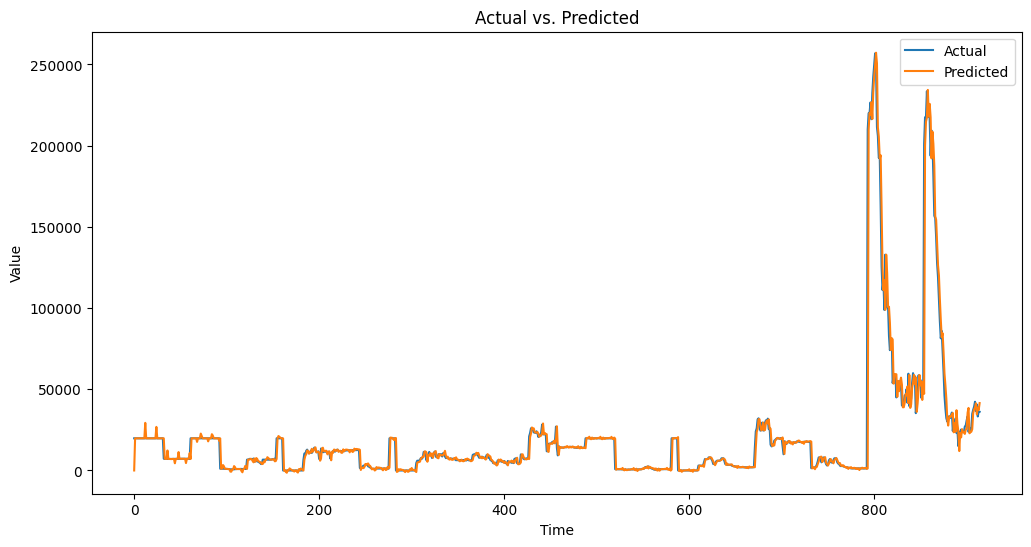

In [19]:


# Choose a time series
time_series = edited_crops.loc[edited_crops['Item'] == 'Sisal raw', 'Y1961':'Y2021'].values.flatten()

import numpy as np

# Replace NaN values with the mean of the series
time_series = np.nan_to_num(time_series, nan=np.nanmean(time_series))

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Sisal Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.show()

# Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Evaluate the model (diagnostic plots, statistical metrics)

# Forecast
forecast = results.forecast(steps=12)  # Forecast for the next 12 months

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label='Forecast')
plt.title('Sisal Production Forecast')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.legend()
plt.show()

# Diagnostic Plots
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Statistical Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate residuals
residuals = time_series - results.fittedvalues

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

# Calculate statistical metrics
mae = mean_absolute_error(time_series, results.fittedvalues)
mse = mean_squared_error(time_series, results.fittedvalues)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(results.fittedvalues, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


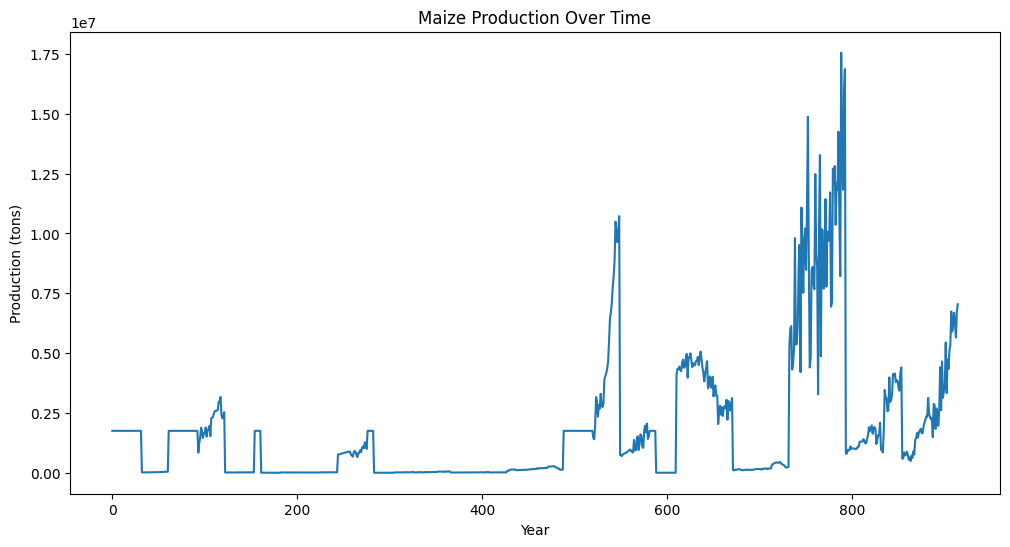

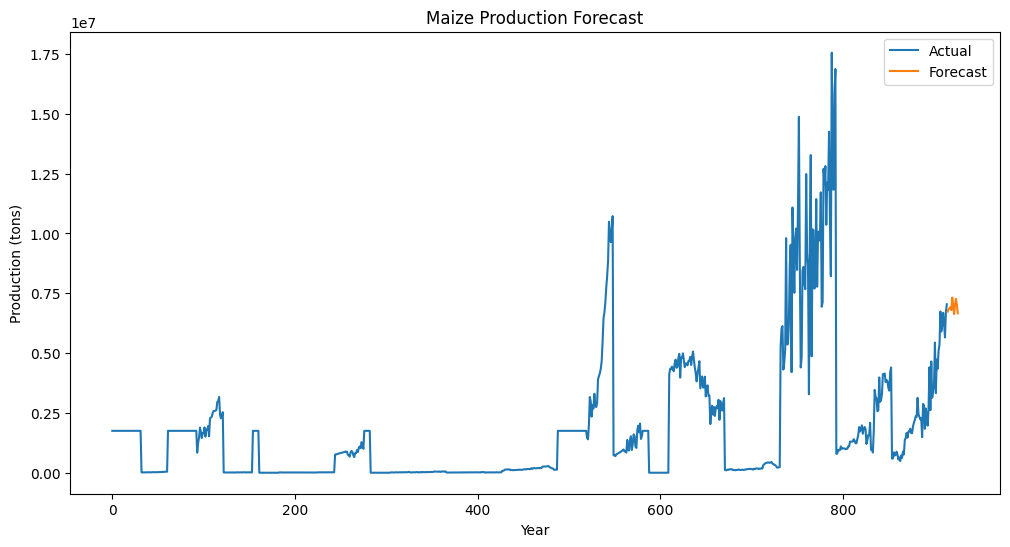

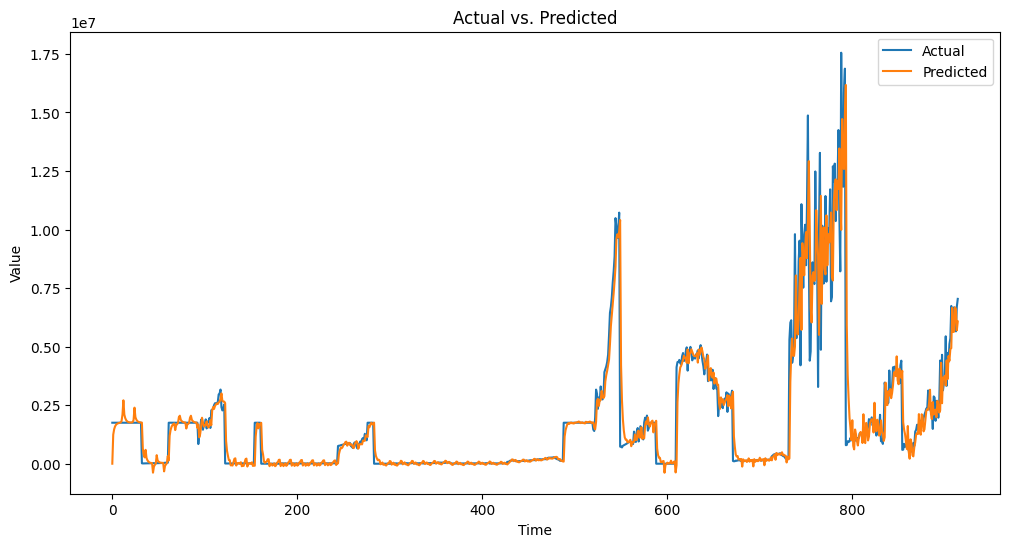

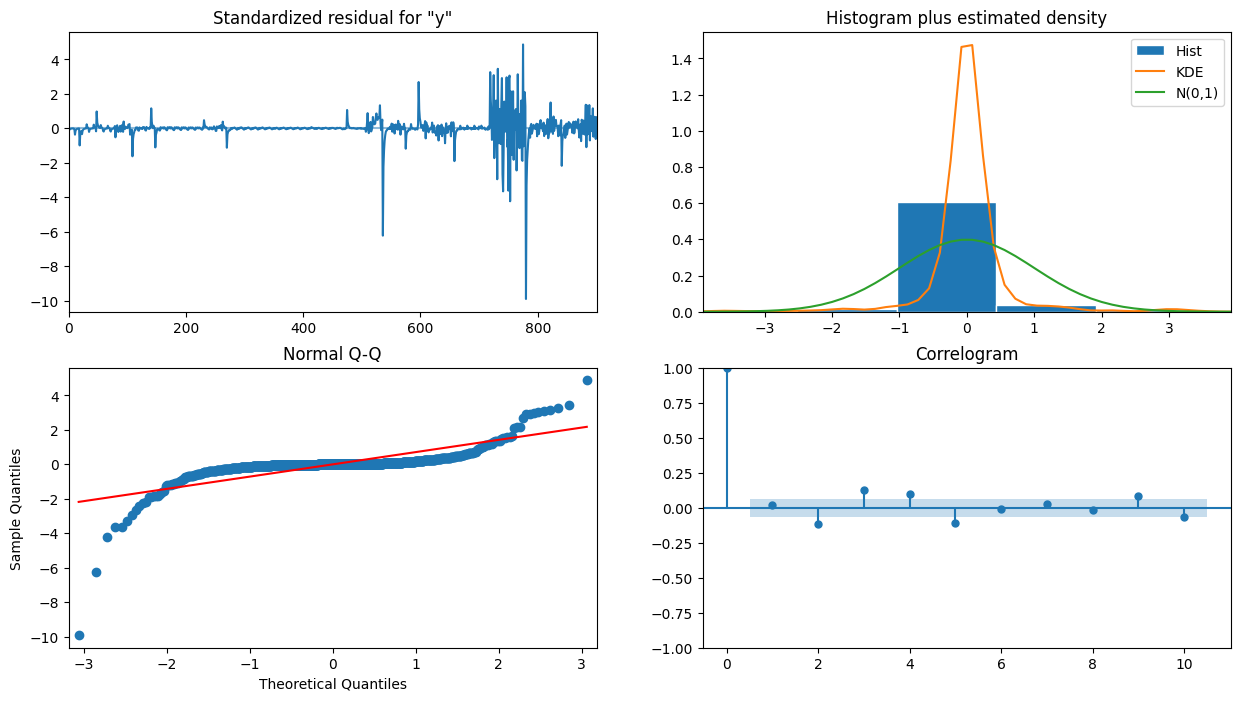

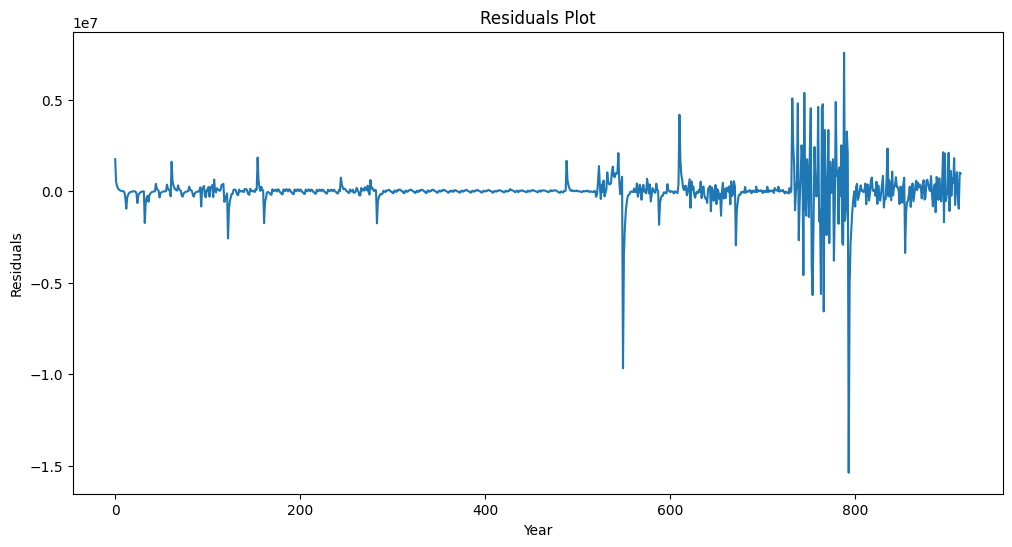

Mean Absolute Error (MAE): 415097.2237923103
Mean Squared Error (MSE): 1213280066534.833
Root Mean Squared Error (RMSE): 1101489.9302920718


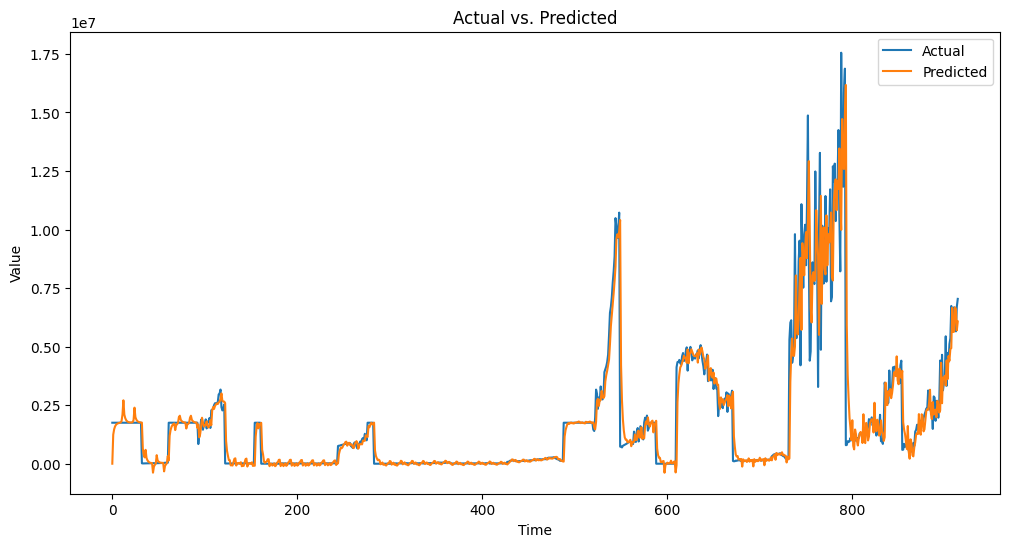

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Choose a time series
time_series = edited_crops.loc[edited_crops['Item'] == 'Maize (corn)', 'Y1961':'Y2021'].values.flatten()

import numpy as np

# Replace NaN values with the mean of the series
time_series = np.nan_to_num(time_series, nan=np.nanmean(time_series))

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Maize Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.show()

# Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Evaluate the model (diagnostic plots, statistical metrics)

# Forecast
forecast = results.forecast(steps=12)  # Forecast for the next 12 months

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label='Forecast')
plt.title('Maize Production Forecast')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.legend()
plt.show()

# Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(results.fittedvalues, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Diagnostic Plots
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Statistical Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate residuals
residuals = time_series - results.fittedvalues

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

# Calculate statistical metrics
mae = mean_absolute_error(time_series, results.fittedvalues)
mse = mean_squared_error(time_series, results.fittedvalues)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(results.fittedvalues, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


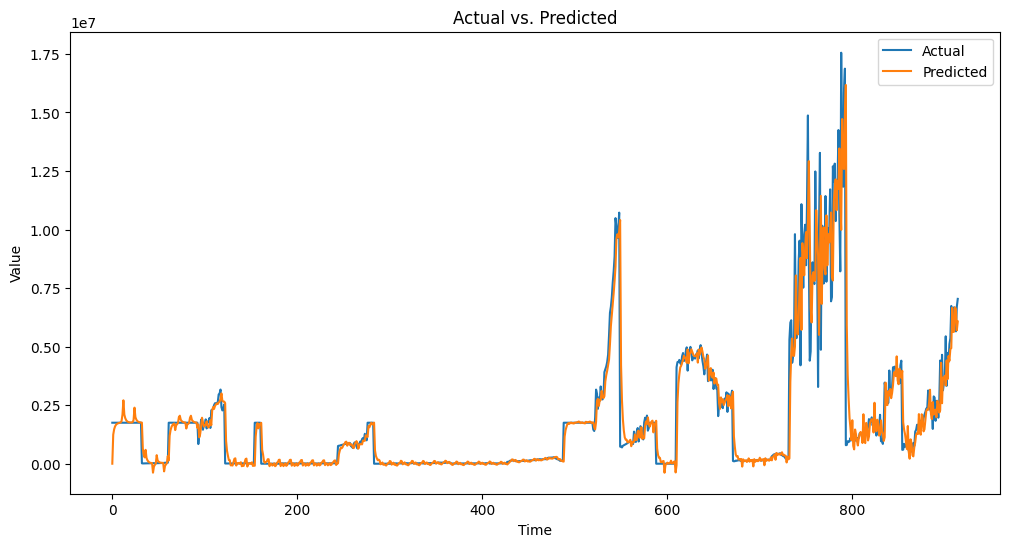

In [16]:
# Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(results.fittedvalues, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<ipython-input-29-9e4fa79bd286>:15: RuntimeWarning: Mean of empty slice
  maize_production_data = np.nan_to_num(maize_production_data, nan=np.nanmean(maize_production_data))


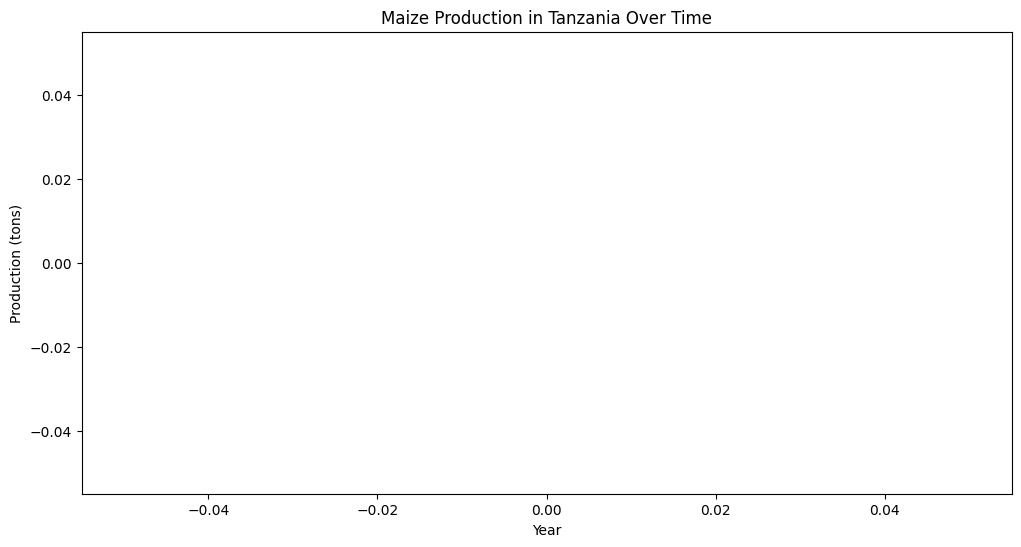

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Filter the data for maize production in Tanzania
maize_production_tanzania = edited_crops[(edited_crops['Area'] == 'Tanzania') & (edited_crops['Item'] == 'Maize (corn)')]

# Extract maize production data for Tanzania
maize_production_data = maize_production_tanzania.loc[:, 'Y1961':'Y2021'].values.flatten()

import numpy as np

maize_production_data = np.nan_to_num(maize_production_data, nan=np.nanmean(maize_production_data))

# Visualize the time series data for maize production in Tanzania
plt.figure(figsize=(12, 6))
plt.plot(maize_production_data)
plt.title('Maize Production in Tanzania Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.show()


# Fit the SARIMA model
model = SARIMAX(maize_production_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


# Generate forecasts for future time periods
forecast_steps = 12  # Forecast for the next 12 months
forecast = results.forecast(steps=forecast_steps)

# Visualize the actual data along with the forecasts
plt.figure(figsize=(12, 6))
plt.plot(range(len(maize_production_data)), maize_production_data, label='Actual')
plt.plot(range(len(maize_production_data), len(maize_production_data) + forecast_steps), forecast, label='Forecast')
plt.title('Maize Production Forecast in Tanzania')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(maize_production_data, results.fittedvalues)
mse = mean_squared_error(maize_production_data, results.fittedvalues)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
